In [1]:
import gudhi as gd
from gudhi import representations
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import pingouin as pg
import scipy.stats as st
from collections import defaultdict
from sklearn.metrics import pairwise_distances
from tqdm.notebook import tqdm
%matplotlib widget

In [2]:
def sampled_ecc_alpha(pointcloud, n_samples, max_filt_val):
    ac = gd.AlphaComplex(points = pointcloud)
    st = ac.create_simplex_tree()
    filt_values = np.linspace(0,max_filt_val,n_samples)
    ecc_values = np.zeros_like(filt_values)
    simplices = list(st.get_filtration())
    cur_val = 0
    i=0
    for (j,t) in enumerate(filt_values):
        while (i<len(simplices)) and (simplices[i][1]<=t):
            cur_val=cur_val +(-1)**(len(simplices[i][0])-1)
            i = i+1
        #print(t, cur_val)
        ecc_values[j] = cur_val
        
    return ecc_values

In [3]:
def get_ecc(data, n_samples, max_filt_val):
    eccs = []
    for dat in tqdm(data):
        ec = sampled_ecc_alpha(dat, n_samples, max_filt_val)
        eccs.append(ec)
    return eccs

In [4]:
def ecc_distance(samples1, samples2, n_samples, max_filt_val):
    ECCs1 = get_ecc(samples1, n_samples = n_samples, max_filt_val = max_filt_val)
    ECCs2 = get_ecc(samples2, n_samples = n_samples, max_filt_val = max_filt_val)
    dists = pairwise_distances(ECCs1,ECCs2, n_jobs=-1, metric = "l1")
    dists = dists *(max_filt_val/(n_samples-1))
    return dists.flatten()

In [5]:
def gen_rv(rv, N, n_samples):
    return [np.array([rv[0].rvs(N), rv[1].rvs(N).tolist()]).T for i in range(n_samples)]

/home/nihell/.local/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [6]:
rv_normal = st.norm()
rv_beta2_2 = st.beta(2, 2)
rv_beta5_5 = st.beta(5, 5)
rv_laplace = st.laplace()
rv_uniform = st.uniform()
rv_t3 = st.t(df=3)


unbounded_rvs = [[rv_normal, rv_normal],
                 [rv_normal, rv_laplace],
                 [rv_normal, rv_t3],
                 [rv_t3, rv_t3],
                 [rv_laplace, rv_laplace]]
unbounded_rv_names = ["N x N", "N x Laplace", "N x T3", "T3 x T3", "Laplace x Laplace"]
bounded_rvs = [[rv_uniform, rv_uniform],
               [rv_uniform, rv_beta2_2],
               [rv_beta5_5, rv_beta2_2],
               [rv_beta2_2, rv_beta2_2]]
bounded_rv_names = ["U x U", "U x B22", "B55 x B22", "B22 x B22"]


In [ ]:
n = 1000,
n_loops = 1000
steps = 101
unbounded_max_filt = 0.3
bounded_max_filt = 2

unbounded_ECCs = []
bounded_ECCs = []
for rv in tqdm(unbounded_rvs):
    samples = gen_rv(rv, n , n_loops)
    unbounded_ECCs.append(get_ecc(samples, steps, unbounded_max_filt)) 

for rv in tqdm(bounded_rvs):
    samples = np.sqrt(n)*np.array(gen_rv(rv, n , n_loops))
    bounded_ECCs.append(get_ecc(samples,steps, bounded_max_filt))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

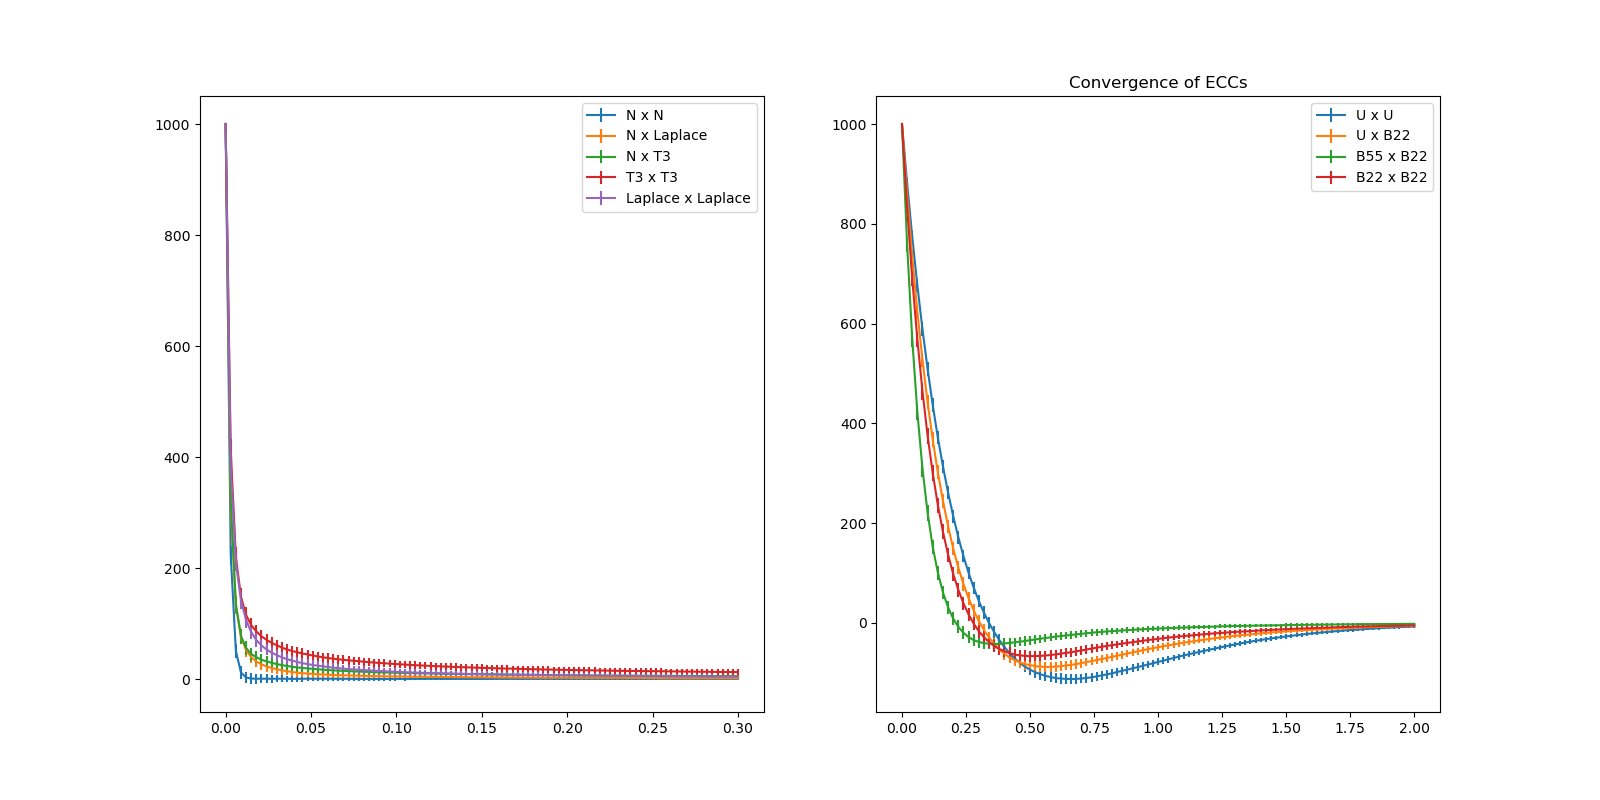

In [8]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (16,8))
for i in range(0,len(unbounded_ECCs)):
    ax1.errorbar(np.linspace(0,unbounded_max_filt,steps), np.mean(unbounded_ECCs[i], axis=0), yerr=np.std(unbounded_ECCs[i],axis=0), label = unbounded_rv_names[i])
for i in range(0,len(bounded_ECCs)):
    ax2.errorbar(np.linspace(0,bounded_max_filt,steps), np.mean(bounded_ECCs[i], axis=0), yerr=np.std(bounded_ECCs[i],axis=0), label = bounded_rv_names[i])
    
plt.title("Convergence of ECCs")
ax1.legend()
ax2.legend()

plt.show()


In [13]:
n_loops = 500
steps = 101
unbounded_max_filt = 0.3
bounded_max_filt = 2
ECCs =[]
scaled_ECCs = []
ns = [10,20,50,100,200,300,500,750,1000]
for n in ns:
    samples = gen_rv(unbounded_rvs[0], n , n_loops)
    ECCs.append(np.array(get_ecc(samples, steps, unbounded_max_filt))/n)
    scaled_ECCs.append(np.array(get_ecc(n**(1/2)*np.array(samples), steps, bounded_max_filt))/n) 

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

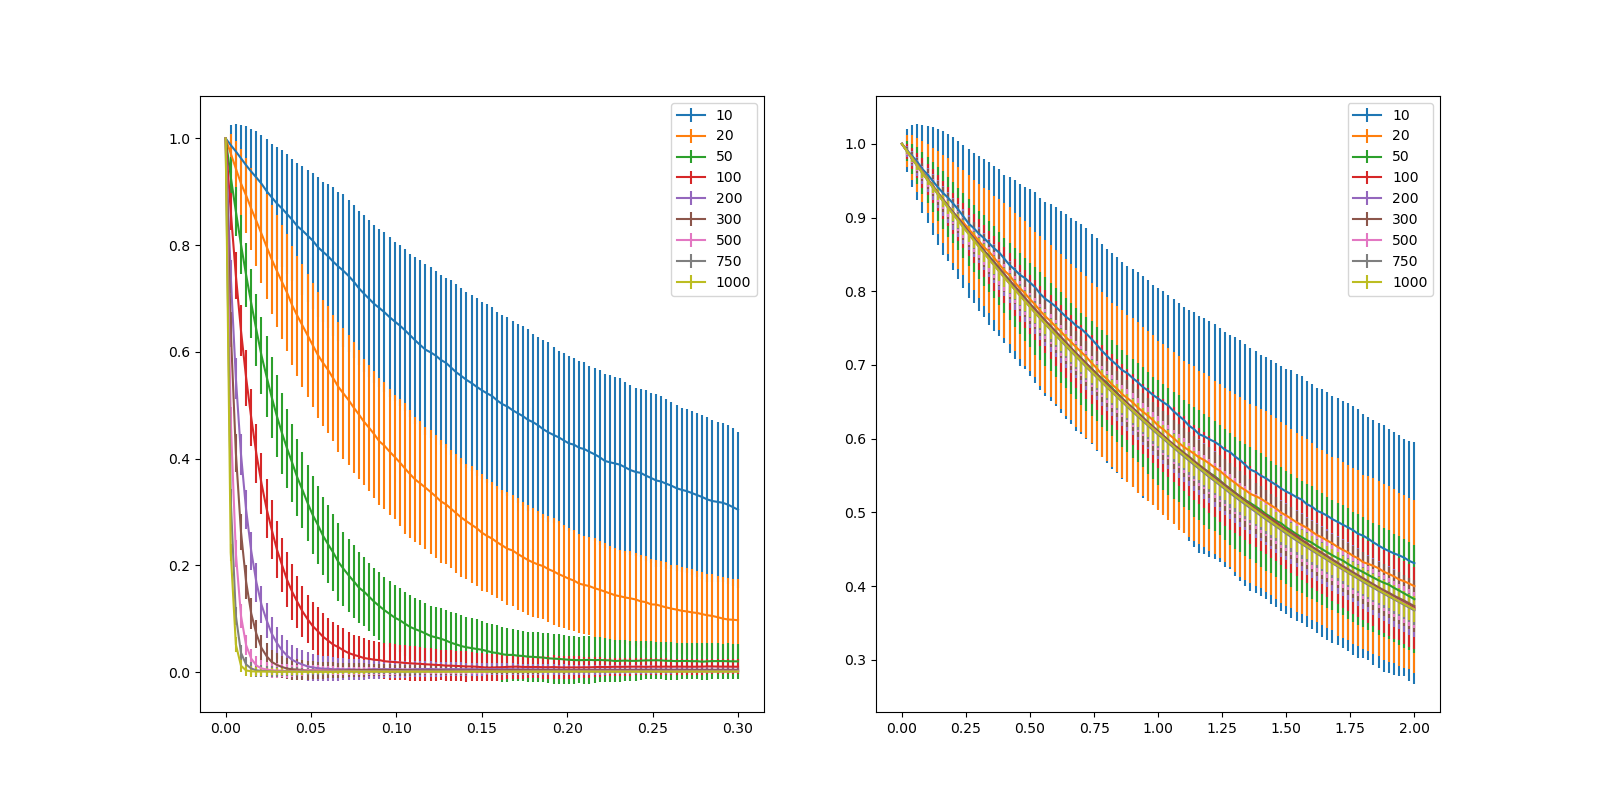

In [14]:
f, ax = plt.subplots(1,2,figsize = (16,8))
for i in range(0,len(ECCs)):
    ax[0].errorbar(np.linspace(0,unbounded_max_filt,steps), np.mean(ECCs[i], axis=0), yerr=np.std(ECCs[i],axis=0), label = ns[i])
    ax[1].errorbar(np.linspace(0,bounded_max_filt,steps), np.mean(scaled_ECCs[i], axis=0), yerr=np.std(scaled_ECCs[i],axis=0), label = ns[i])
    
ax[0].legend()
ax[1].legend()
plt.show()

In [48]:
n_loops = 500
steps = 101
unbounded_max_filt = 0.3
bounded_max_filt = 2
ECCs =[]
scaled_ECCs = []
ns = [2,10,20,50,100,200,300,500,750,1000]
for n in ns:
    samples = gen_rv(bounded_rvs[0], n , n_loops)
    ECCs.append(np.array(get_ecc(samples, steps, unbounded_max_filt))/n) 
    scaled_ECCs.append(np.array(get_ecc(n**(1/2)*np.array(samples), steps, bounded_max_filt))/n) 

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

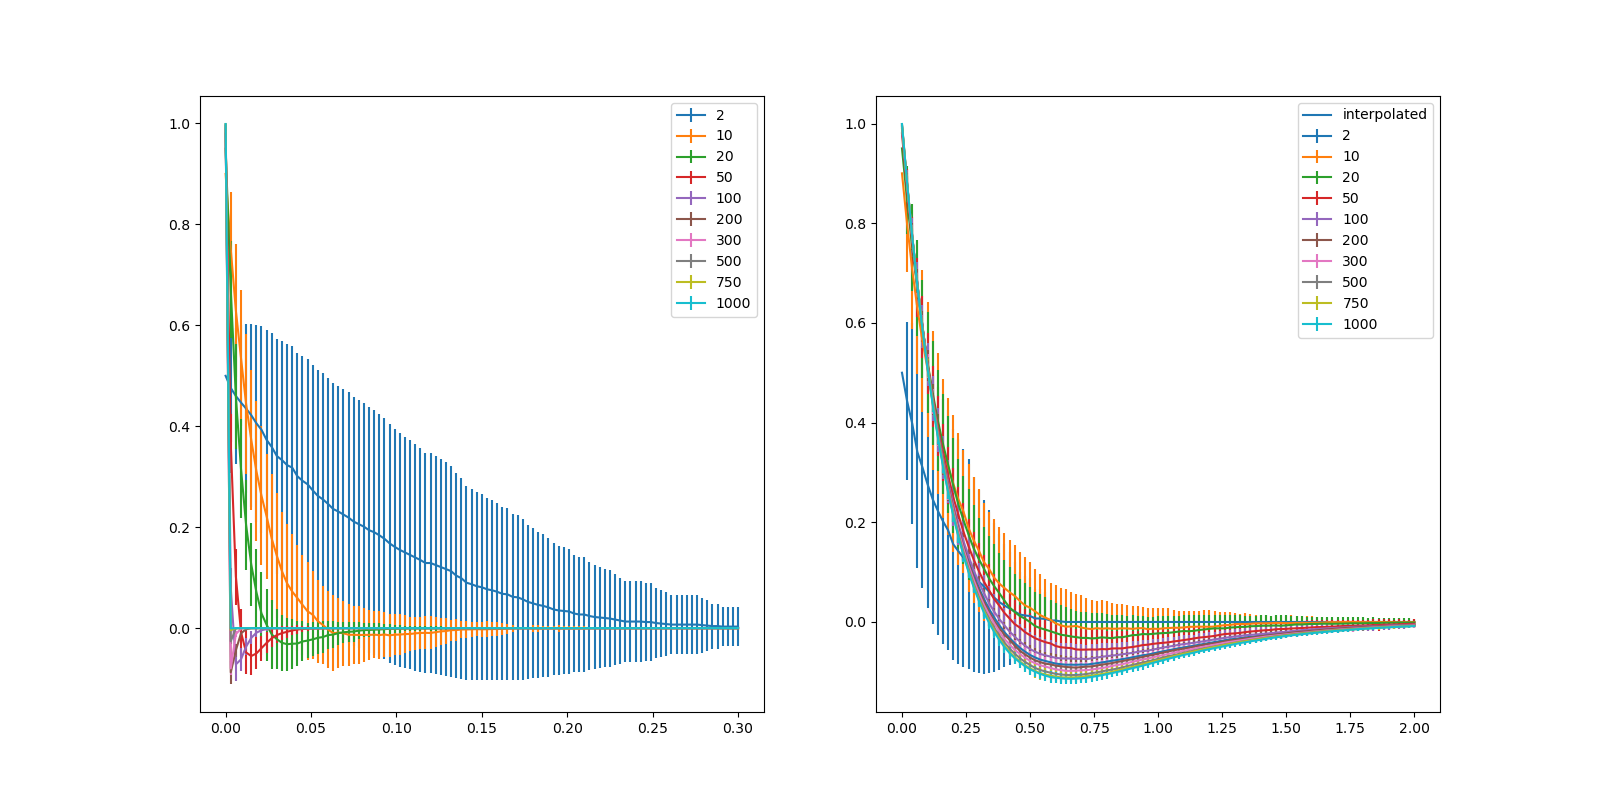

In [49]:
f, ax = plt.subplots(1,2,figsize = (16,8))
for i in range(0,len(ECCs)):
    ax[0].errorbar(np.linspace(0,unbounded_max_filt,steps), np.mean(ECCs[i], axis=0)-1/ns[i], yerr=np.std(ECCs[i],axis=0), label = ns[i])
    ax[1].errorbar(np.linspace(0,bounded_max_filt,steps), np.mean(scaled_ECCs[i], axis=0)-1/ns[i], yerr=np.std(scaled_ECCs[i],axis=0), label = ns[i])
    
ax[1].plot(np.linspace(0,bounded_max_filt,steps), 0.5*(np.mean(scaled_ECCs[4], axis=0)-1/ns[4]+np.mean(scaled_ECCs[6], axis=0)-1/ns[6]), label ="interpolated")
ax[0].legend()
ax[1].legend()
plt.show()

In [42]:
def expected_ecc_formula(n, r, d, a):
    lmbd = np.pi*n*(r**d)
    return n* np.exp(-lmbd)*(1+sum([a[j]*(lmbd**j) for j in range(1,d)]))

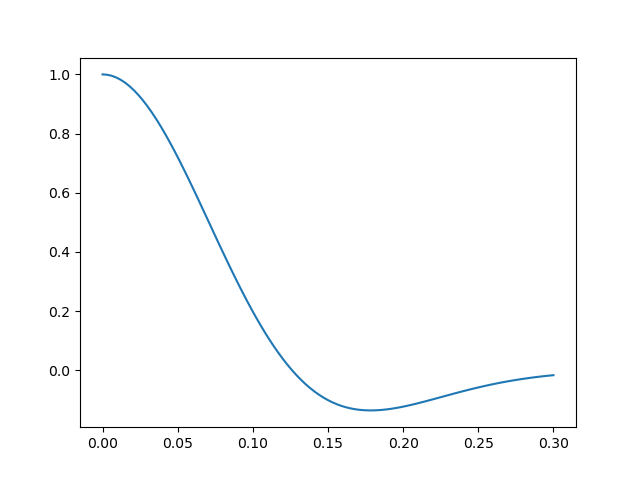

In [46]:
f,ax = plt.subplots()
ax.plot(np.linspace(0,unbounded_max_filt,steps), [expected_ecc_formula(20, r, 2, [-1,-1])/20 for r in np.linspace(0,unbounded_max_filt,steps)])
plt.show()

[2.0,
 1.9999999583648504,
 1.999999334109411,
 1.9999966312208726,
 1.9999893631263534,
 1.9999740628351133,
 1.9999462970768114,
 1.9999006843753364,
 1.9998309169809572,
 1.9997297865671524,
 1.9995892135825368,
 1.9994002801328943,
 1.9991532662535456,
 1.9988376894181439,
 1.998442347116623,
 1.997955362322469,
 1.997364231657762,
 1.9966558760536859,
 1.9958166936943555,
 1.99483261502304,
 1.9936891595820903,
 1.992371494451206,
 1.99086449404312,
 1.9891528010113235,
 1.987220888021174,
 1.985053120133555,
 1.9826338175492804,
 1.9799473184625573,
 1.9769780417731353,
 1.973710549409138,
 1.9701296080161161,
 1.966220249772406,
 1.9619678320965144,
 1.9573580960188643,
 1.952377222997817,
 1.9470118899683864,
 1.9412493224214127,
 1.935077345321134,
 1.9284844316800152,
 1.921459748621287,
 1.9139932007718883,
 1.906075470841288,
 1.8976980572549276,
 1.8888533087247363,
 1.8795344556531879,
 1.8697356382817034,
 1.8594519315086944,
 1.8486793663172076,
 1.837414947766814,
 1.8